<h1>Bài 5 _ Bài tập thêm

<h4>Để kiểm tra xem khối u, tổn thương trong ngực bệnh nhân có phải là ung thư hay
không, người ta thực hiện phương pháp chọc hút tế bào bằng kim nhỏ (FNA). Tế bào
lấy được sau đó được phân tích dưới kính hiển vi. Bảng dữ liệu6 trong mục tài liệu
tham khảo được tính từ hình ảnh dưới kính hiển vi, các thuộc tính trong bảng mô tả
các đặc tính của tế bào được phân tích. Sinh viên hãy dùng thuật toán gom cụm để
gom nhóm các khối u lành tính (benign) hoặc ác tính (malignant)

<H3>Import các thư viện cần thiết

In [154]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

<h3>1.	Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu.

In [155]:
df = pd.read_csv("E:\\IS252\\Lab5\\data\\titanic.csv")

<li>Xem 12 dòng dữ liệu đầu

In [156]:
df.head(12)

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


<li>Trả thông tin của những column

In [157]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Survived   1309 non-null   int64  
 2   Name       1309 non-null   object 
 3   Sex        1309 non-null   object 
 4   Age        1046 non-null   float64
 5   SibSp      1309 non-null   int64  
 6   Parch      1309 non-null   int64  
 7   Ticket     1309 non-null   object 
 8   Fare       1308 non-null   float64
 9   Cabin      295 non-null    object 
 10  Embarked   1307 non-null   object 
 11  Boat       486 non-null    object 
 12  Body       121 non-null    float64
 13  Home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<li>Kiểm tra dữ liệu

In [158]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Body,1188,90.8
Cabin,1014,77.5
Boat,823,62.9
Home.dest,564,43.1
Age,263,20.1


<P><strong>Kết luận: </strong>Tiền xử lý dữ liệu</p>

<p>Đầu tiên, tiến hành xem xét các thuộc tính thiếu sót nhiều giá trị. Có thể xóa đi các thuộc
tính body, cabin, boat, home.dest vì không có ảnh hưởng nhiều đến sự tồn tại của hành
khách. Tuy nhiên, mỗi giá trị của thuộc tính cabin ví dụ như ‘C123’ có các ký tự đầu ‘C’
là boong mà hành khách đó đang đi. Dữ liệu này có thể hữu ích nên có thể tách ra, giữ
lại trước khi xóa.

In [159]:
import re

deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}

for dataset in [df]:
    dataset['Cabin']= dataset['Cabin'].fillna("U0")
    dataset['deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z])+").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int) 

df = df.drop(['Cabin'],axis =1)

<p>Xem xét thuộc tính ticket

In [160]:
df['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

<p>Có thể thấy thuộc tính ticket có đến 929 giá trị khác nhau, có khả năng thuộc tính này sẽ không giúp ích được trong quá trình khai thác, ngược lại còn gây sai số cho thuật toán nên có thể xóa nó đi.</p>

<p>Thực hiện xóa các thuộc tính không cần thiết.</p>

In [161]:
df=df.drop(['Ticket'],axis=1)
df= df.drop(['Boat'],axis=1)
df=df.drop(['Body'],axis=1)
df=df.drop(['Home.dest'],axis=1)

Điền giá trị còn thiếu vào thuộc tính tuổi (age).<br>
Các giá trị này sẽ được sinh ngẫu nhiên dựa vào giá trị trung bình, độ lệch chuẩn và số các giá trị còn thiếu.


In [162]:
for dataset in [df]:
    #Tính trung bình tuổi
    mean = df["Age"].mean() 
    #Tính độ lệch chuẩn tuổi
    std = df["Age"].std() 
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    #Điền giá trị NAN vào cột tuổi với các giá trị ngẫu nhiên
    age_slice  = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)]= rand_age
    dataset["Age"]=age_slice
    dataset["Age"]=df["Age"].astype(int)
df["Age"].isnull().sum() 

0

<p>Xóa thuộc tính Name và Sex vì không cần thiết trong quá trình thực thi

In [163]:
df = df.drop(['Name'],axis =1)
df = df.drop(['Sex'],axis =1)

<li>Chia tập dữ liệu

In [164]:
feature = df.drop('Survived',axis=1)
label = df['Survived']

<h3>2.	Chọn thuộc tính Age và Parch để gom cụm. Sử dụng phương pháp khuỷu tay (ELBOW method) để xác định số cụm cần thiết. Tiến hành gom cụm bằng thuật toán k-Means với số cụm vừa xác định.

In [165]:
X1 = feature[['Age', 'Parch']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init = 'random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

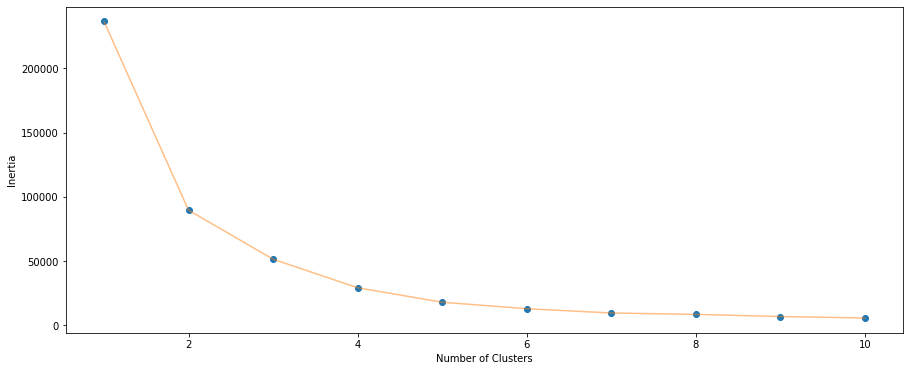

In [166]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

<li>Chọn k=2 với hai thuộc tính sống sót hay không

In [167]:
algorithm = KMeans(n_clusters = 2, init = 'random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

<h3>3.	Biểu diễn kết quả gom cụm trên bằng biểu đồ.

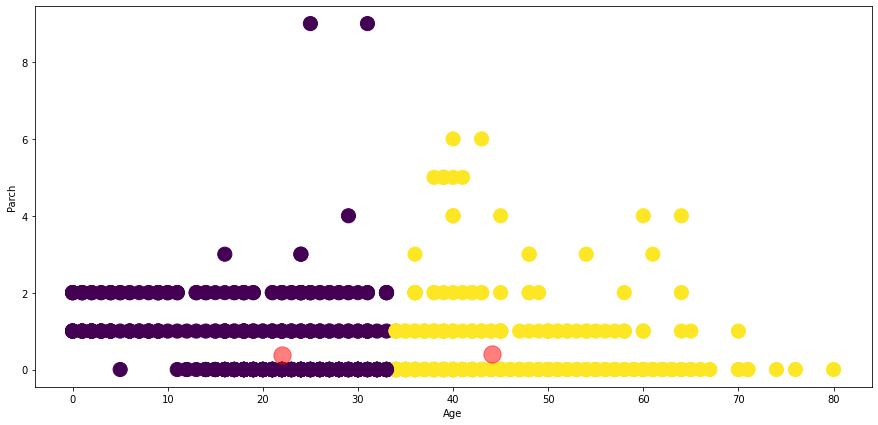

In [168]:
plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter(x = 'Age', y = 'Parch', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s =300, c = 'red', alpha = 0.5)
plt.ylabel('Parch'), plt.xlabel('Age')
plt.show()

In [169]:
metrics.silhouette_score(X1, labels1, metric = 'euclidean')

0.5648000064310335

<h3>4.	So sánh với thuộc tính phân lớp có sẵn, sử dụng ma trận nhầm lẫn và các độ đo Precision, Recall, F1-score:

<li>Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử với ỷ lệ 7-3

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.3,random_state=0)

<p>Tiến hành gom cụm thuộc tính Age và Parch

In [172]:
x1_train = x_train[['Age', 'Parch']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init = 'random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

<p>Kết quả gom cụm

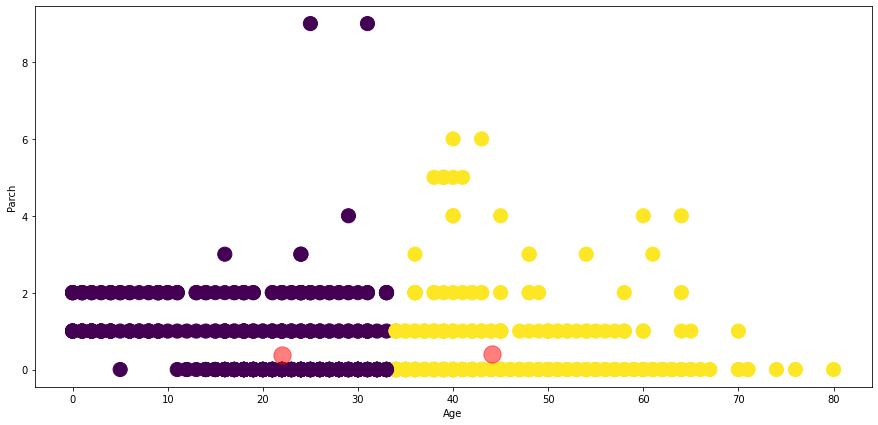

In [173]:
plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter(x = 'Age', y = 'Parch', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s =300, c = 'red', alpha = 0.5)
plt.ylabel('Parch'), plt.xlabel('Age')
plt.show()

<p>Chọn k=2 là điểm không làm cho WSS thay đổi nhiều
<p>Tiến hành gom cụm dữ liệu Age và Parch

In [174]:
algorithm = KMeans(n_clusters = 2, init = 'random')
algorithm.fit(x1_train,y_train)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [175]:
x_test = x_test[['Age','Parch']]

<p>Tiến hành áp dụng mô hình trên dữ liệu kiểm thử. Thư viện này cũng sẽ hỗ trợ việc tính toán các thông tin như độ chính xác, độ phủ của mô hình đã xây dựng

In [176]:
KMean_pred = algorithm.predict(x_test)

KMeans_score = metrics.accuracy_score(y_test,KMean_pred)
print("Accruracy:",KMeans_score)
print("Report:",metrics.classification_report(y_test,KMean_pred))

Accruracy: 0.4758269720101781
Report:               precision    recall  f1-score   support

           0       0.64      0.37      0.47       246
           1       0.38      0.65      0.48       147

    accuracy                           0.48       393
   macro avg       0.51      0.51      0.48       393
weighted avg       0.54      0.48      0.47       393



C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<p>Tính toán ma trận nhầm lẫn

In [177]:
KMeans_cm = metrics.confusion_matrix(y_test,KMean_pred)

<p>Và biểu diễn nó lên đồ thị heatmap

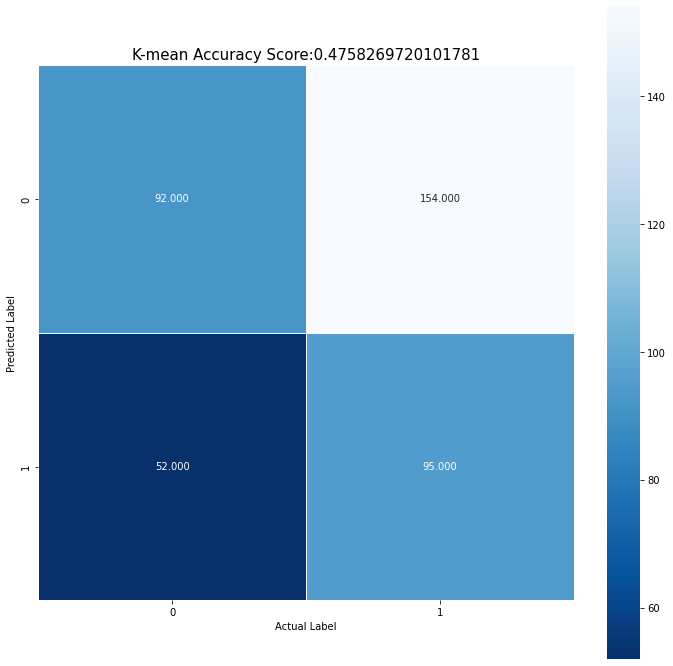

In [178]:
plt.figure(figsize=(12,12))
sns.heatmap(KMeans_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='K-mean Accuracy Score:{0}'.format(KMeans_score)
plt.title(title,size=15);

<strong>Kết luận: </strong>Độ chính xác khi gom cụm: 0.4758269720101781